<a href="https://colab.research.google.com/github/Alekhya253/Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Image classification using CIFAR-10 and CIFAR-100 Dataset in TensorFlow


In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


Importing Dataset

In [2]:
# Load in the data
cifar100 = tf.keras.datasets.cifar100

# Distribute it to train and test set
(x_train, y_train), (x_val, y_val) = cifar100.load_data()
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)


169001437/169001437 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


Data Visualization

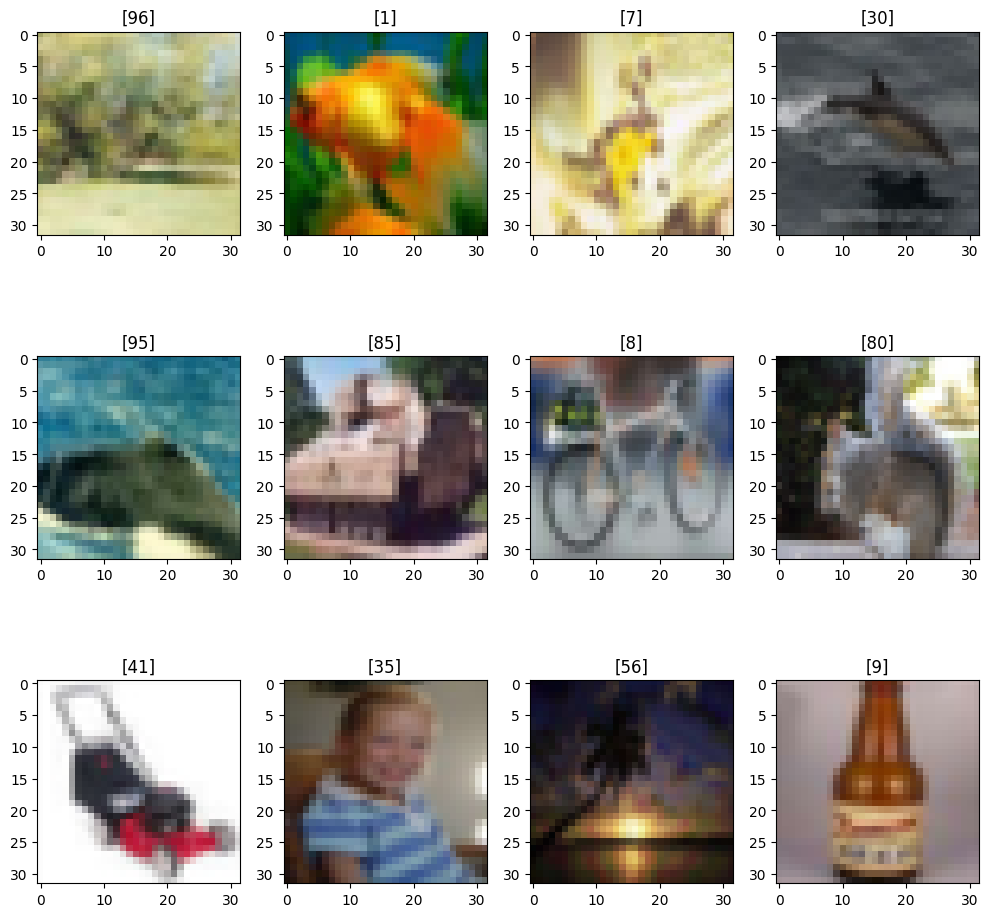

In [3]:
def show_samples(data, labels):
	plt.subplots(figsize=(10, 10))
	for i in range(12):
		plt.subplot(3, 4, i+1)
		k = np.random.randint(0, data.shape[0])
		plt.title(labels[k])
		plt.imshow(data[k])
	plt.tight_layout()
	plt.show()


show_samples(x_train, y_train)


Data Splitting

In [4]:
y_train = tf.one_hot(y_train,
					depth=y_train.max() + 1,
					dtype=tf.float64)
y_val = tf.one_hot(y_val,
				depth=y_val.max() + 1,
				dtype=tf.float64)

y_train = tf.squeeze(y_train)
y_val = tf.squeeze(y_val)


Model Architecture

In [5]:
model = tf.keras.models.Sequential([
	layers.Conv2D(16, (3, 3), activation='relu',
				input_shape=(32, 32, 3), padding='same'),
	layers.Conv2D(32, (3, 3),
				activation='relu',
				padding='same'),
	layers.Conv2D(64, (3, 3),
				activation='relu',
				padding='same'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(128, (3, 3),
				activation='relu',
				padding='same'),


	layers.Flatten(),
	layers.Dense(256, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(256, activation='relu'),
	layers.Dropout(0.3),
	layers.BatchNormalization(),
	layers.Dense(100, activation='softmax')
])

model.compile(
	loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
	optimizer='adam',
	metrics=['AUC', 'accuracy']
)


In [6]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                        

Model fitting

In [7]:
hist = model.fit(x_train, y_train,
				epochs=5,
				batch_size=64,
				verbose=1,
				validation_data=(x_val, y_val))


Epoch 1/5
782/782 [==============================] - 620s 789ms/step - loss: 3.9508 - auc: 0.7771 - accuracy: 0.1072 - val_loss: 3.4525 - val_auc: 0.8485 - val_accuracy: 0.1924
Epoch 2/5
782/782 [==============================] - 581s 742ms/step - loss: 3.0870 - auc: 0.8862 - accuracy: 0.2434 - val_loss: 2.7700 - val_auc: 0.9110 - val_accuracy: 0.3091
Epoch 3/5
782/782 [==============================] - 574s 734ms/step - loss: 2.5811 - auc: 0.9228 - accuracy: 0.3416 - val_loss: 2.5823 - val_auc: 0.9162 - val_accuracy: 0.3526
Epoch 4/5
782/782 [==============================] - 564s 721ms/step - loss: 2.1836 - auc: 0.9450 - accuracy: 0.4244 - val_loss: 2.2666 - val_auc: 0.9341 - val_accuracy: 0.4134
Epoch 5/5
782/782 [==============================] - 552s 707ms/step - loss: 1.7820 - auc: 0.9632 - accuracy: 0.5136 - val_loss: 2.3760 - val_auc: 0.9206 - val_accuracy: 0.4112


Using model to train for CIFAR10

In [8]:
temp = model.get_layer('conv2d_3')
last_output = temp.output
last_output.shape


TensorShape([None, 16, 16, 128])

In [9]:
x = layers.Flatten()(last_output)

x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)

output = layers.Dense(10, activation='softmax')(x)

model_new = keras.Model(model.input, output)


In [10]:
model_new.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                             

Compiling Model

In [11]:
model_new.compile(
	loss='categorical_crossentropy',
	optimizer='adam',
	metrics=['AUC', 'accuracy']
)


In [12]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_val, y_val) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)


170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [13]:
y_train = tf.one_hot(y_train, depth=10,
					dtype=tf.float64)
y_val = tf.one_hot(y_val, depth=10,
				dtype=tf.float64)

y_train = tf.squeeze(y_train)
y_val = tf.squeeze(y_val)



In [ ]:
history = model_new.fit(x_train, y_train,
						batch_size=64,
						epochs=5,
						verbose=1,
						validation_data=(x_val, y_val))
